**IMPORT NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import  RFE
from sklearn.metrics import accuracy_score,precision_score,f1_score, roc_auc_score
import sklearn.metrics as metrics

In [2]:
df = pd.read_csv('/home/jerome/Documents/Brest cancer/breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**CHECK FOR DUPLICATES AND NULL VALUES**

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**DROP ID COLUMN**

In [7]:
df.drop("id", axis= 1, inplace= True)

**CHECK DATA DISTRIBUTION FOR NUMERIC COLUMNS**

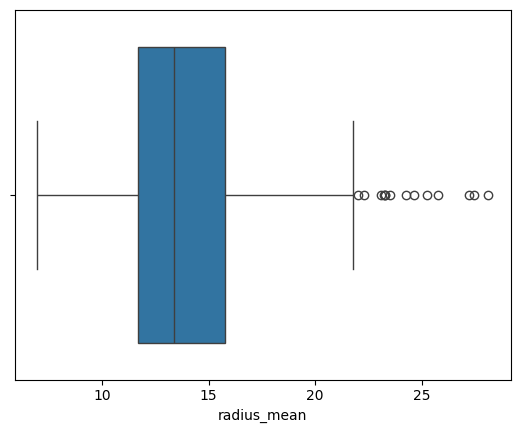

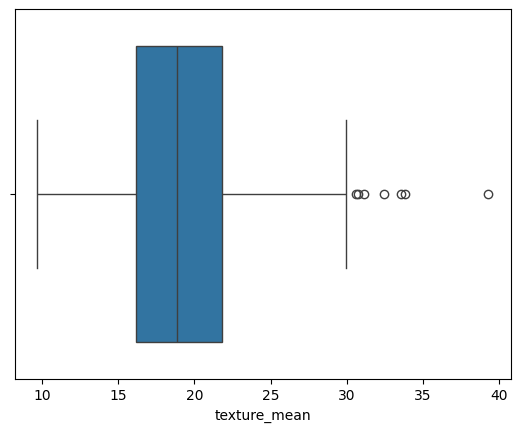

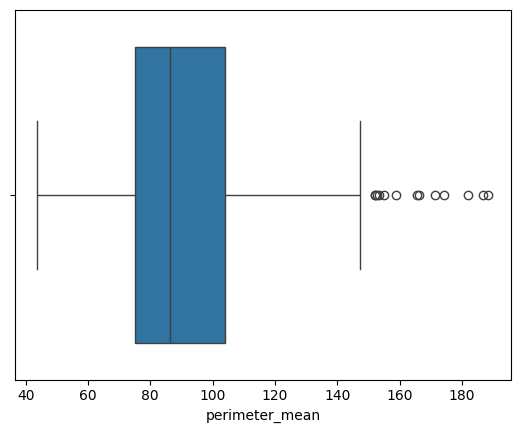

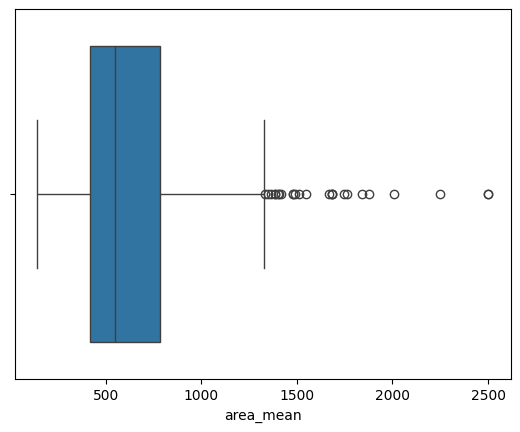

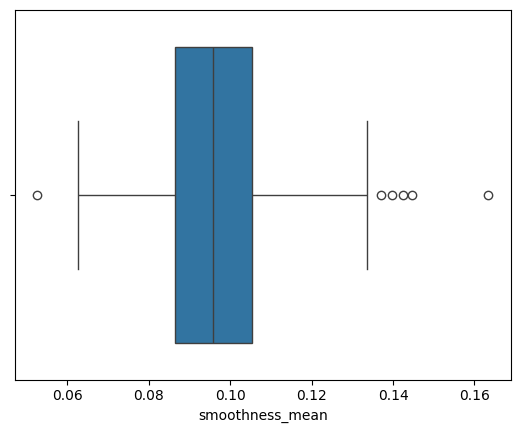

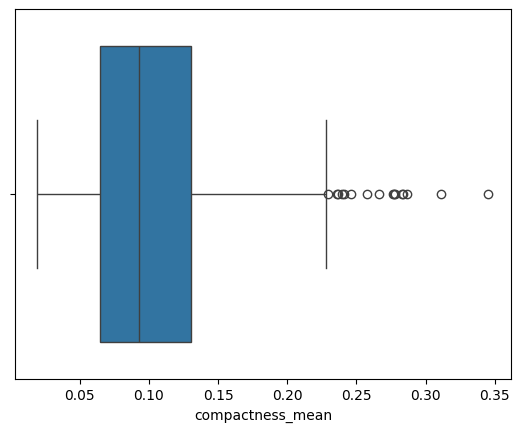

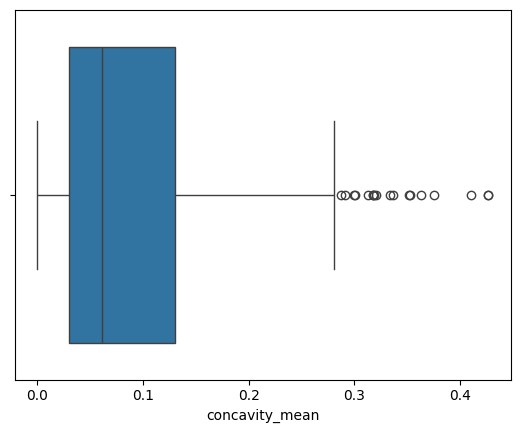

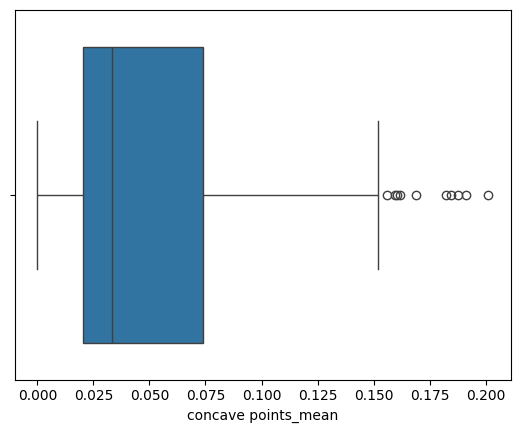

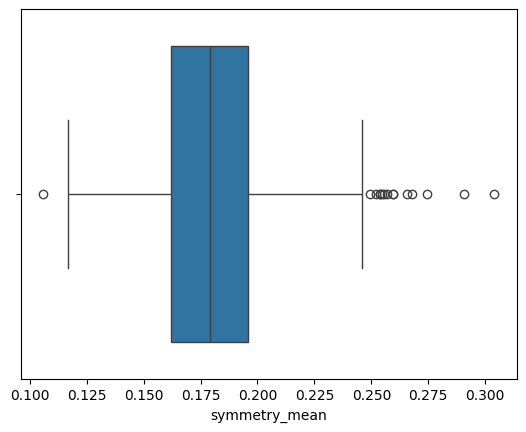

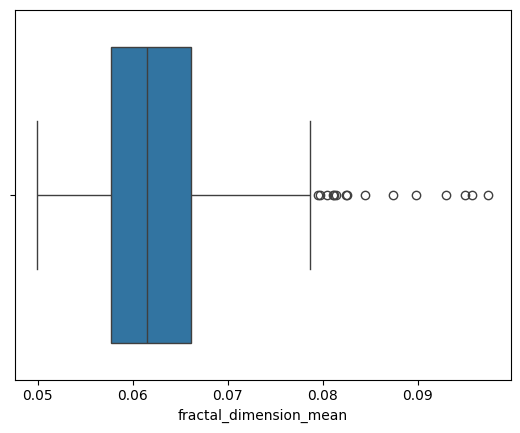

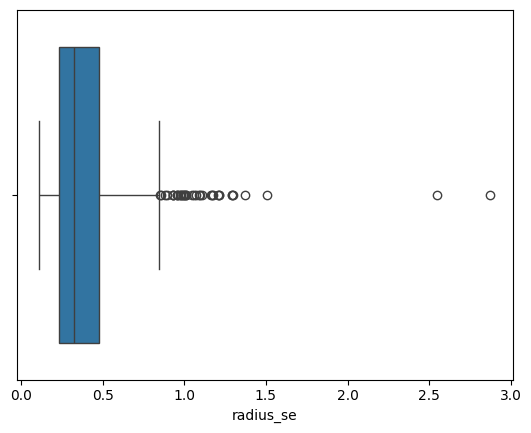

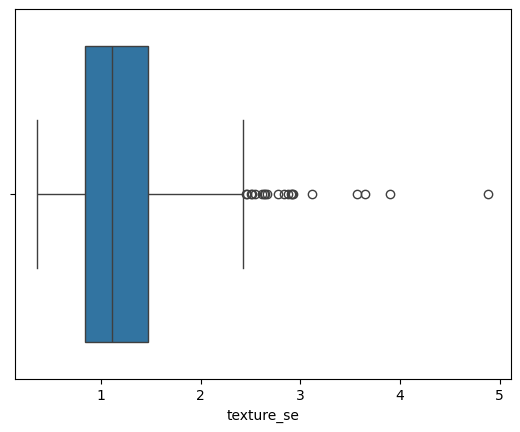

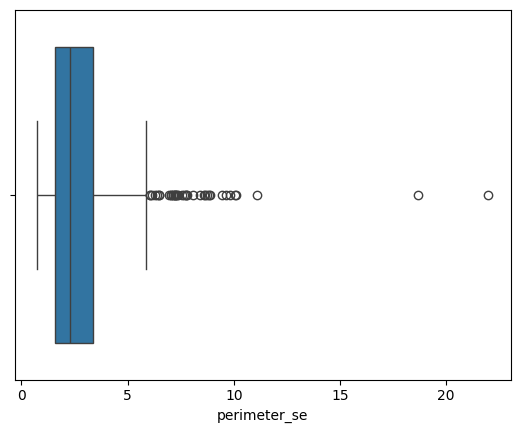

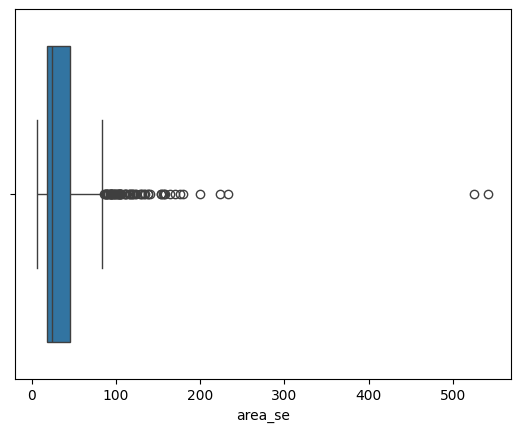

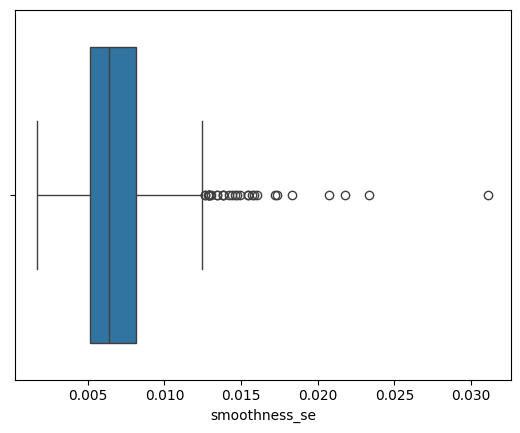

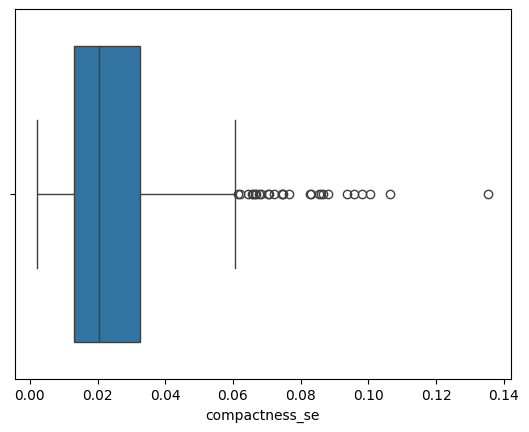

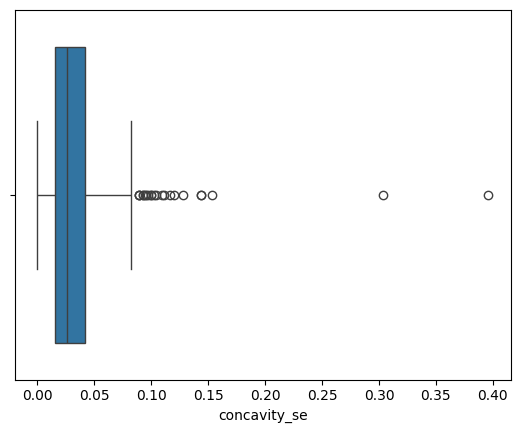

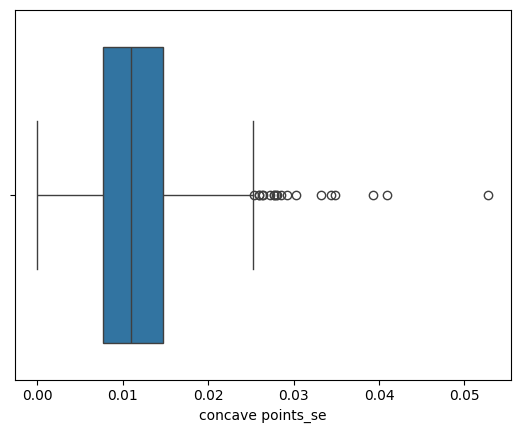

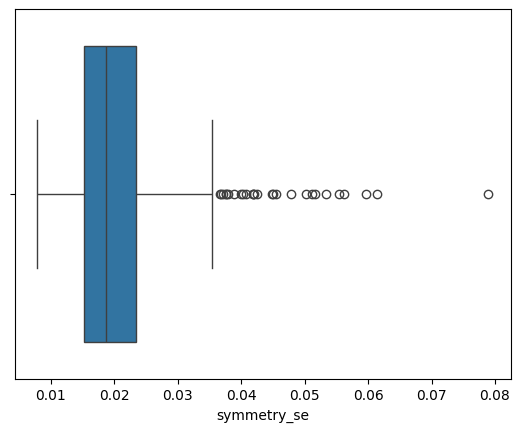

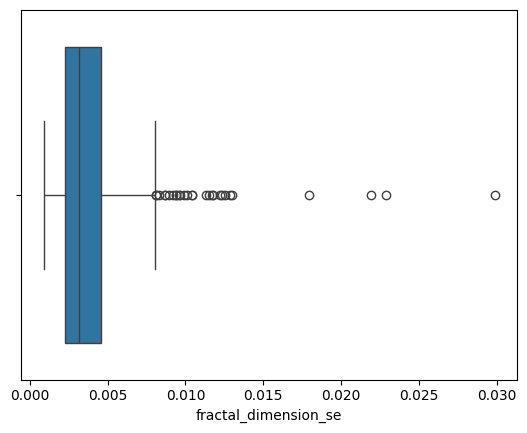

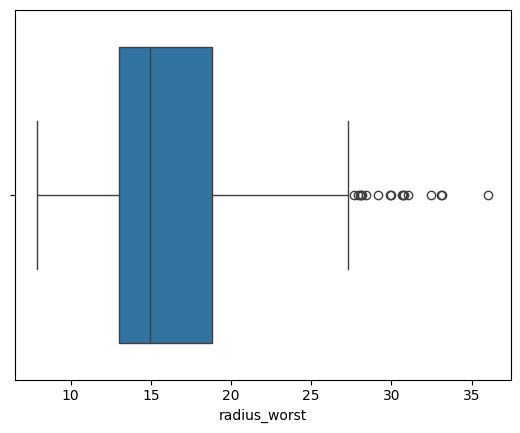

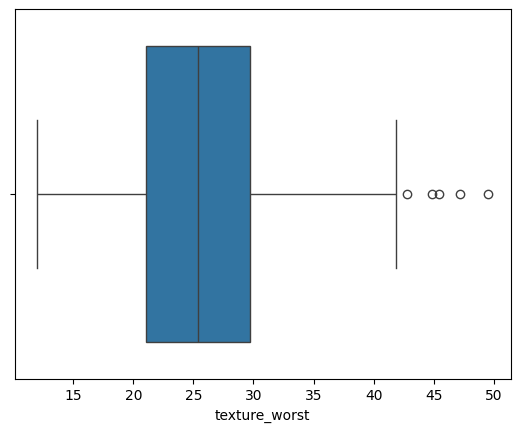

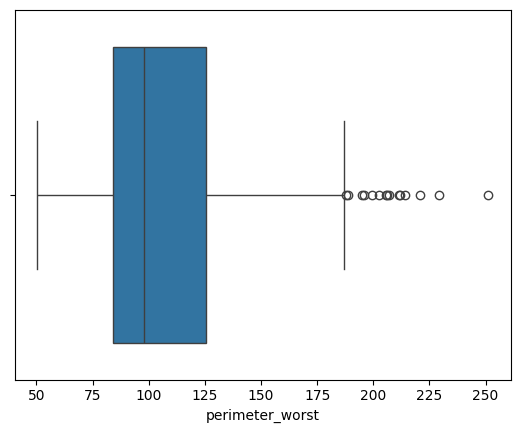

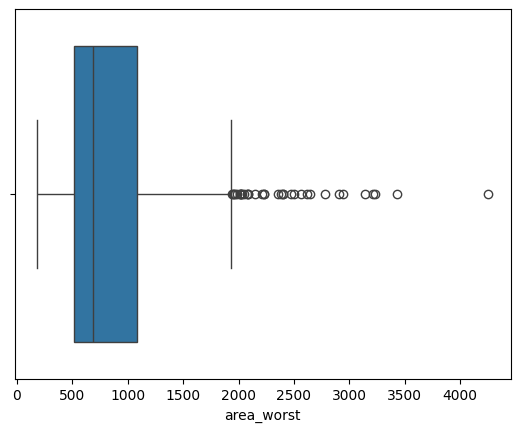

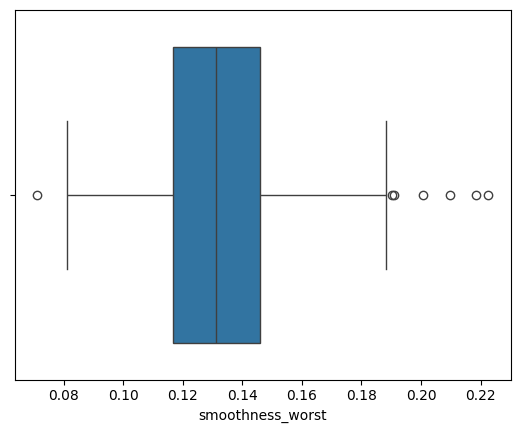

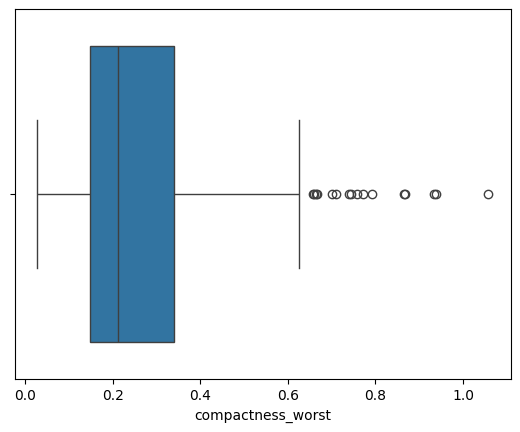

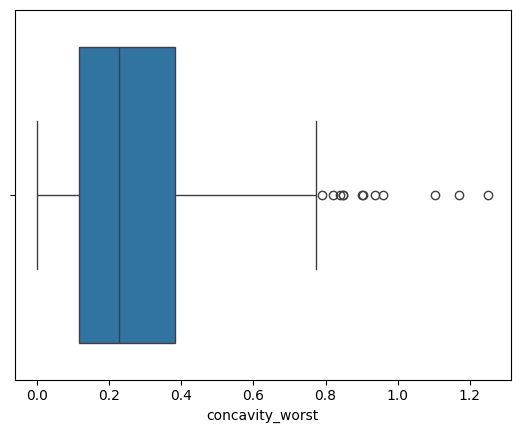

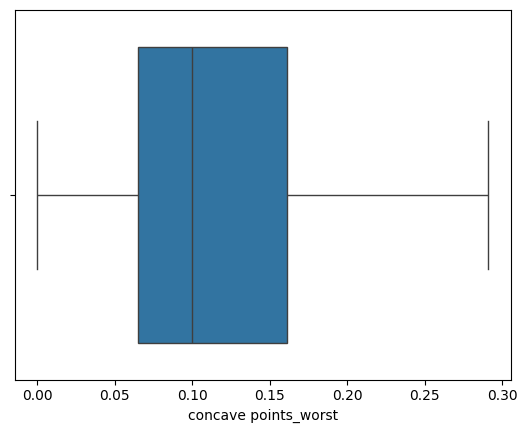

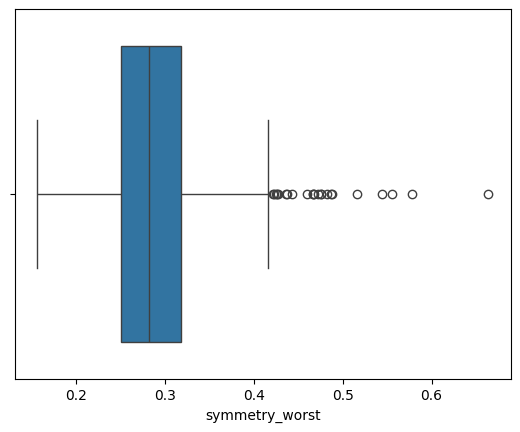

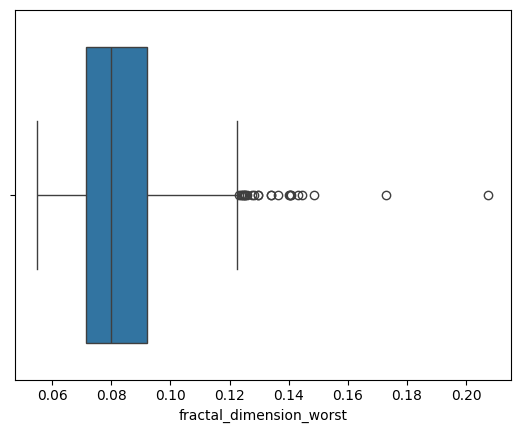

In [8]:
num =df.select_dtypes("number")
for x in num.columns:
    sns.boxplot(x= num[x])
    plt.show()

**ENCODING TARGET COLUMN(DIAGNOSIS)**

In [9]:
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

**CHECKING CORRELEATION IN RELATION TO DIAGNOSIS**

In [10]:
correlation = abs(pd.DataFrame(df.corr().diagnosis))
correlation

,diagnosis
diagnosis,1.000000
radius_mean,0.730029
texture_mean,0.415185
perimeter_mean,0.742636
area_mean,0.708984
smoothness_mean,0.358560
compactness_mean,0.596534
concavity_mean,0.696360
concave points_mean,0.776614
symmetry_mean,0.330499


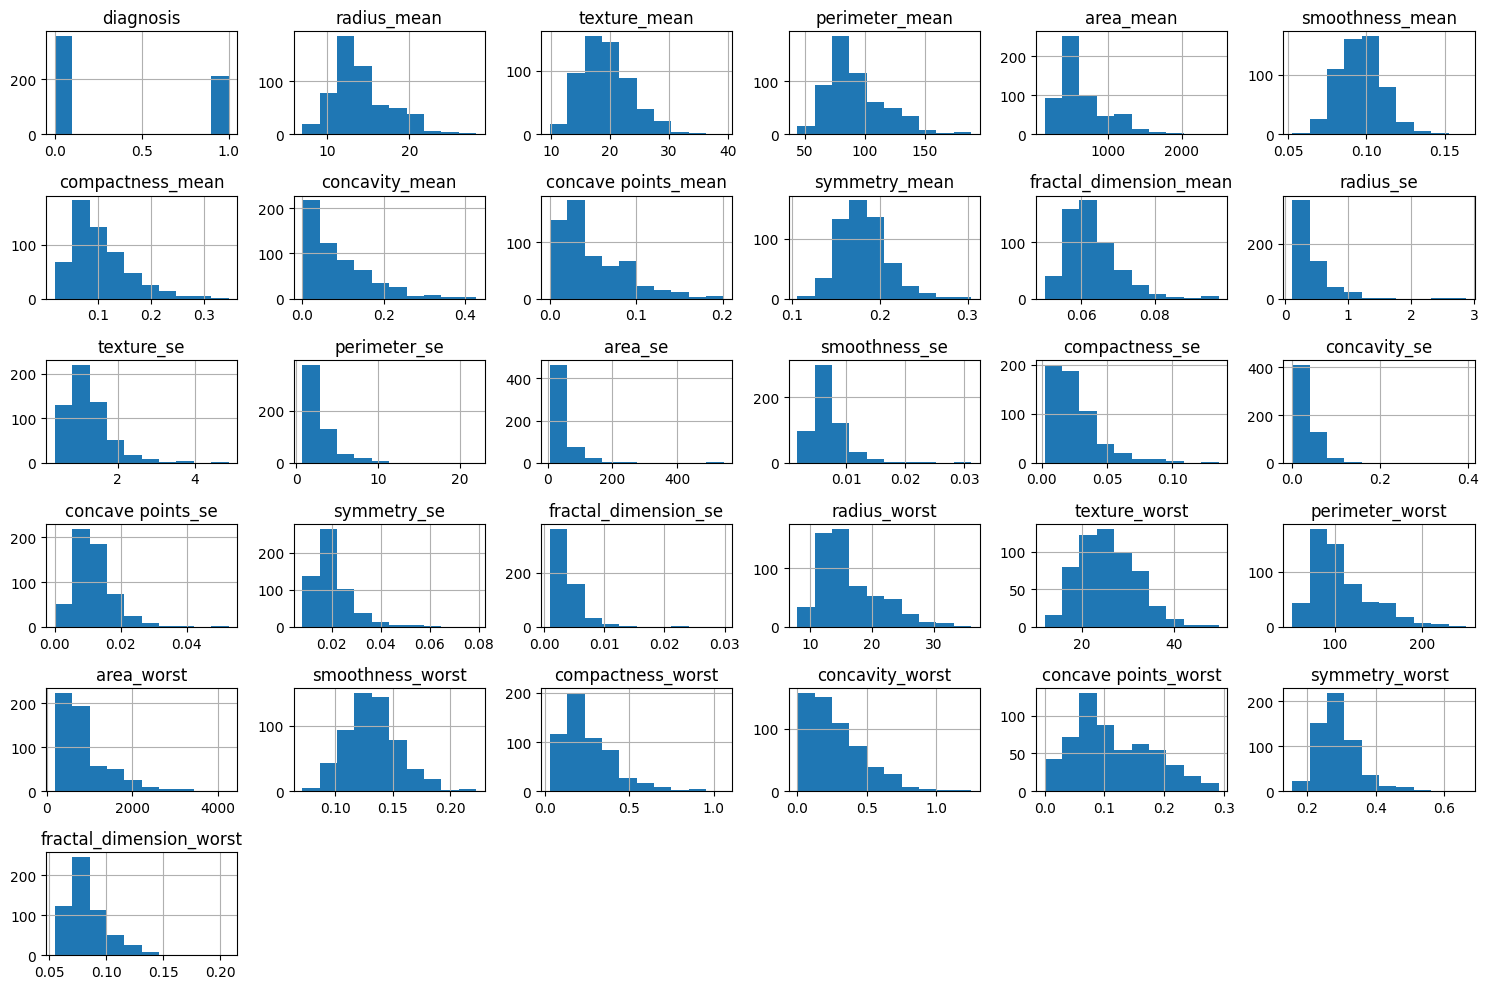

In [11]:
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

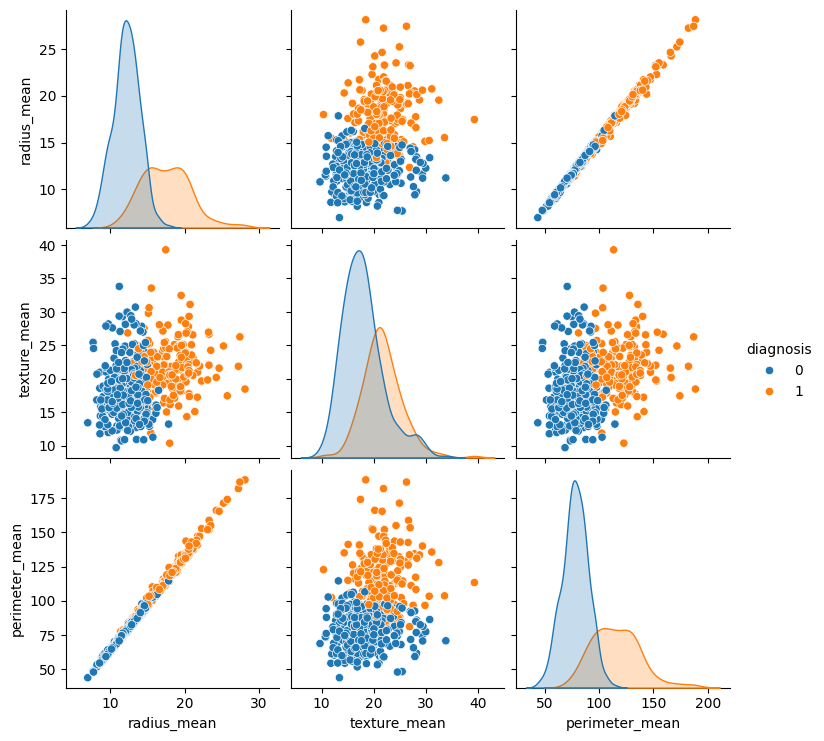

In [12]:
sns.pairplot(df, hue = 'diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean'])

**DATA SLITTING**

In [13]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5826)

**SCALING**

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**FEATURE SELECTION AND MODEL TRAINING**

In [15]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select = 10)
rfe.fit(X_train_scaled, y_train)

X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

In [16]:
selected_features = X.columns[rfe.support_]
selected_features

Index(['concave points_mean', 'fractal_dimension_mean', 'radius_se', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concave points_worst'],
      dtype='object')

In [17]:
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

**MODEL EVALUATION**

In [18]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy:' '%.4f' % acc)

Accuracy:0.9649


In [19]:
acc = precision_score(y_test, y_pred)
print('precision:' '%.4f' % acc)

precision:0.9437


In [20]:
acc = f1_score(y_test, y_pred)
print('f1:' '%.4f' % acc)

f1:0.9571


In [21]:
auc_roc = roc_auc_score(y_test, y_pred)
print('AUC-ROC Score:' '%.4f' % auc_roc)

AUC-ROC Score:0.9659


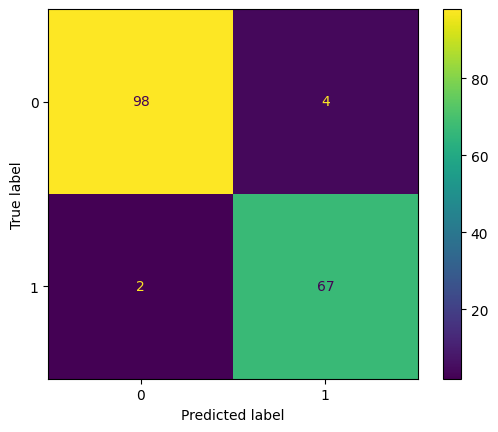

In [22]:
cm = metrics.confusion_matrix(y_test,y_pred,labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
disp.plot()

**In the top-left corner, the number 98 indicates that the model correctly predicted class 0 when the actual class was 0 — these are the true negatives. The bottom-right corner, with the number 67, shows the true positives — the model correctly predicted class 1 when the actual class was also 1.**

**The top-right cell shows 4 instances where the model predicted class 1 when the actual class was 0. These are false positives, meaning the model mistakenly thought those samples were positive. The bottom-left cell, with 2 cases, shows false negatives — the model predicted 0 when the actual class was 1.**

**Overall, this confusion matrix reflects strong model performance, with only 6 misclassified samples out of a total of 171.**